<a href="https://colab.research.google.com/github/Nolanole/DS-Unit-2-Linear-Models/blob/master/module1-regression-1/LS_DS_211_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.


The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [X] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

## Look at the data

In [0]:
import pandas_profiling
df.profile_report()

##  What's the distribution of the target, `price`?

In [0]:
# We can use pandas & numpy to get the same info shown in: 
# Pandas Profiling Report - Variables - Price - Toggle details - Statistics
pd.options.display.float_format = '{:,}'.format
df['price'].describe()

count              48,818.0
mean    3,579.5609816051456
std       1,762.42087543672
min                 1,375.0
25%                 2,500.0
50%                 3,150.0
75%                 4,095.0
max                15,500.0
Name: price, dtype: float64

## Look at `longitude` and `latitude`

New York City lat, long is 40.661, -73.944

https://tools.wmflabs.org/geohack/geohack.php?pagename=New_York_City&params=40.661_N_73.944_W_region:US-NY_type:city(8175133)

In [0]:
import plotly.express as px
px.scatter(df, x='longitude', y='latitude', opacity=0.2)

## What is the mean price in your subset of the data?

In [0]:
df['price'].mean()

3579.5609816051456

In [0]:
df['price'].describe()

count              48,818.0
mean    3,579.5609816051456
std       1,762.42087543672
min                 1,375.0
25%                 2,500.0
50%                 3,150.0
75%                 4,095.0
max                15,500.0
Name: price, dtype: float64

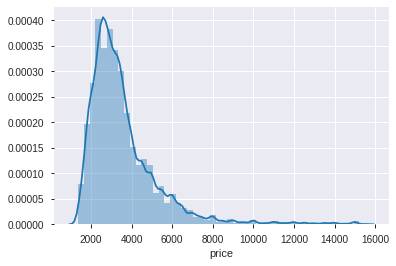

In [0]:
%matplotlib inline
import seaborn as sns
sns.distplot(df['price']);

## Choose a feature, and plot its relationship with the target

In [0]:
px.scatter(df, x='bedrooms', y='price', opacity=0.05, trendline='ols')

## Use scikit-learn for linear regression with one feature

In [0]:
# 1. Import the appropriate estimator class from Scikit-Learn
from sklearn.linear_model import LinearRegression

# 2. Instantiate this class
model = LinearRegression()

# 3. Arrange X features matrix & y target vector
features = ['bedrooms']
target = 'price'
X = df[features]
y = df[target]

# 4. Fit the model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Define a function to make new predictions and explain the model coefficient

In [0]:
# 5. Apply the model to *new/unknown* data
def predict(bedrooms):
    y_pred = model.predict([[bedrooms]])
    estimate = y_pred[0]
    coefficient = model.coef_[0]
    
    # Format with $ and comma separators. No decimals.
    result = f'Rent for a {bedrooms}-bedroom apartment in New York City is estimated at ${estimate:,.0f}.'
    explanation = f' Each additional bedroom is associated with a ${coefficient:,.0f} increase in this model.'
    return result + explanation

predict(1)

'Rent for a 1-bedroom apartment in New York City is estimated at $3,121. Each additional bedroom is associated with a $853 increase in this model.'

In [0]:
predict(2)

'Rent for a 2-bedroom apartment in New York City is estimated at $3,974. Each additional bedroom is associated with a $853 increase in this model.'

In [0]:
predict(3)

'Rent for a 3-bedroom apartment in New York City is estimated at $4,828. Each additional bedroom is associated with a $853 increase in this model.'

## Organize and comment your code

In [0]:
from ipywidgets import interact
import pandas as pd
from sklearn.linear_model import LinearRegression

# Read New York City apartment rental listing data
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

# Arrange X features matrix & y target vector
features = ['bedrooms']
target = 'price'
X = df[features]
y = df[target]

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predict
def predict(bedrooms):
    y_pred = model.predict([[bedrooms]])
    estimate = y_pred[0]
    coefficient = model.coef_[0]
    
    # Format with $ and comma separators. No decimals.
    result = f'Rent for a {bedrooms}-bedroom apartment in New York City is estimated at ${estimate:,.0f}.'
    explanation = f' Each additional bedroom is associated with a ${coefficient:,.0f} increase in this model.'
    return result + explanation

interact(predict, bedrooms=(1,4));

interactive(children=(IntSlider(value=2, description='bedrooms', max=4, min=1), Output()), _dom_classes=('widg…

## Stretch Goal: Do linear regression with two or more features

In [0]:
px.scatter_3d(df, x='bedrooms', y='bathrooms', z='price', opacity=0.05)

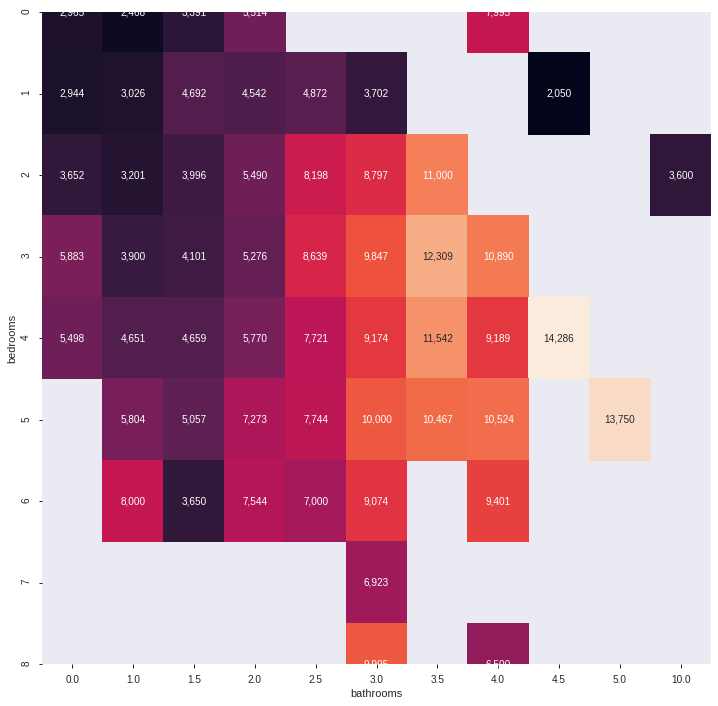

In [0]:
table = df.pivot_table('price', 'bedrooms', 'bathrooms')
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
sns.heatmap(table, annot=True, fmt=',.0f', cbar=False);

In [0]:
# Arrange X features matrix & y target vector
features = ['bedrooms', 'bathrooms']
target = 'price'
X = df[features]
y = df[target]

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predict
def predict(bedrooms, bathrooms):
    y_pred = model.predict([[bedrooms, bathrooms]])
    estimate = y_pred[0]
    bed_coef = model.coef_[0]
    bath_coef = model.coef_[1]
    
    # Format with $ and comma separators. No decimals.
    result = f'Rent for a {bedrooms}-bed, {bathrooms}-bath apartment in NYC is estimated at ${estimate:,.0f}.'
    explanation = f' In this model, each bedroom adds ${bed_coef:,.0f} and each bathroom adds ${bath_coef:,.0f}.'
    return result + explanation

interact(predict, bedrooms=(1,4), bathrooms=(1,4,0.5));

interactive(children=(IntSlider(value=2, description='bedrooms', max=4, min=1), FloatSlider(value=2.0, descrip…